In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [395]:
df=pd.read_csv('/Users/dongchen/Documents/MMAI/MBAN_6110/Assignment_1/sales_data.csv')
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000


In [396]:
#Find out number of the missing data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Step.1:  I chose to do is to drop all the NaN data in the 'Product' and 'Region' column, cause it the type of data that I could not predict and fill the missing by analyze the certain colunm .

In [397]:
#drop the missing data in Product and Region colunms 
df1 = df.dropna(subset=['Product','Region'])
#check if there are still missin data in those two colunms
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       766 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


Step.2 Try to find the best way to fill the NaN data at the price colunm

In [398]:
#compare the mean and median
df1.groupby('Product')['Price'].agg(['mean','median'])

,mean,median
Product,,
Product_1,98.842941,72.550
Product_10,103.243125,94.755
Product_11,125.675455,85.430
Product_12,81.461538,82.690
Product_13,88.629412,54.910
Product_14,105.698889,55.650
Product_15,89.121053,39.720
Product_16,78.740833,46.760
Product_17,119.851765,120.080


Step.3: I will use the mean price and mean units sold of each productto fill the missing price and units sold. Then combine it with the quantity of sold product to give advise 

In [399]:
price_mean = df1.groupby(['Product'])['Price'].mean().to_frame()
type(price_mean)

pandas.core.frame.DataFrame

In [400]:
#Use products' mean price to fill the missing value in price colunm
for index, rows in price_mean.iterrows(): 
    df1.loc[df1['Product']==index,'Price'] = df1.loc[df1['Product']==index,'Price'].fillna(price_mean.loc[index,'Price'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


In [401]:
avg_units = df1.groupby('Product')['Units Sold'].mean().to_frame()
avg_units

,Units Sold
Product,
Product_1,10.500000
Product_10,11.166667
Product_11,11.636364
Product_12,10.750000
Product_13,10.733333
Product_14,11.166667
Product_15,10.833333
Product_16,10.615385
Product_17,10.133333


In [402]:
for index,rows in avg_units.iterrows():
     df1.loc[df1['Product']==index,'Units Sold']=df1.loc[df1['Product']==index,'Units Sold'].fillna(avg_units.loc[index,'Units Sold'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  851 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


In [403]:
df1['Revenue'] = df1['Price']*df1['Units Sold']
df1

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/2603443275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue'] = df1['Price']*df1['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Revenue
1,Product_40,Region_2,46.190000,10.0,2022-01-02,461.900000
2,Product_1,Region_5,98.842941,4.0,2022-01-03,395.371765
3,Product_6,Region_8,143.470000,8.0,2022-01-04,1147.760000
4,Product_44,Region_4,122.540000,10.0,2022-01-05,1225.400000
5,Product_21,Region_8,15.760000,20.0,2022-01-06,315.200000
...,...,...,...,...,...,...
1044,Product_39,Region_6,239.070000,10.0,2023-05-18,2390.700000
1045,Product_42,Region_3,18.630000,9.0,2023-07-10,167.670000
1046,Product_4,Region_3,159.270000,10.0,2024-07-14,1592.700000
1047,Product_43,Region_1,2.910000,13.0,2023-08-17,37.830000


First, I create a plot that reflect the sum of revenue in different region, in the chart we could notice that region 2 has the highest revenue, as a company I would like to know what kind of product are popular in that region

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/2195686231.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  a1=sns.catplot(x='Region', y='Revenue', data =df1, kind ='bar',order =r_order, palette='Blues',ci =False, height=5,aspect=2)


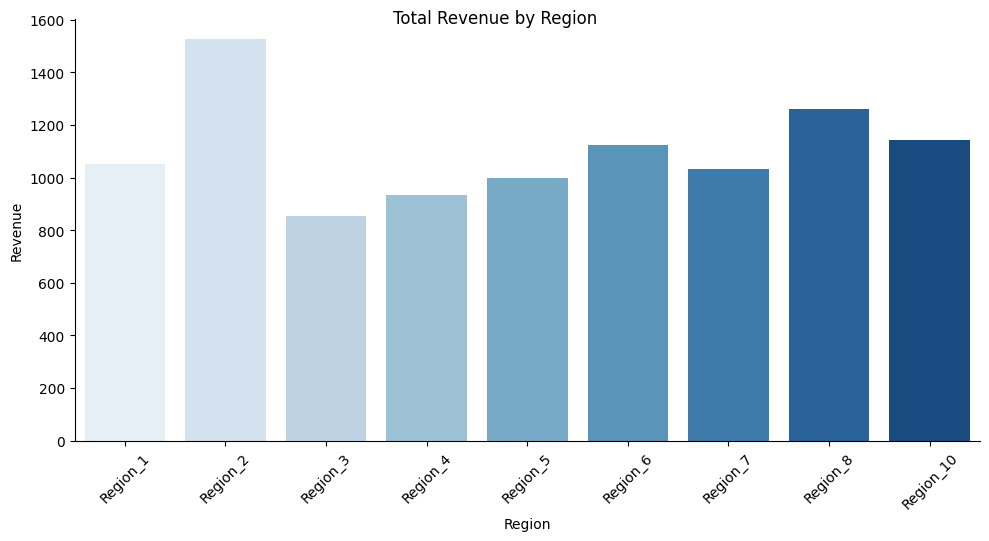

In [404]:
r_order = ['Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_10']
a1=sns.catplot(x='Region', y='Revenue', data =df1, kind ='bar',order =r_order, palette='Blues',ci =False, height=5,aspect=2)
a1.fig.suptitle('Total Revenue by Region')
plt.xticks(rotation =45)
plt.show()

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/4239514218.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  a2=sns.catplot(x='Product', y='Revenue', data = r3_data, kind='bar',height=10,aspect=2, ci=False)


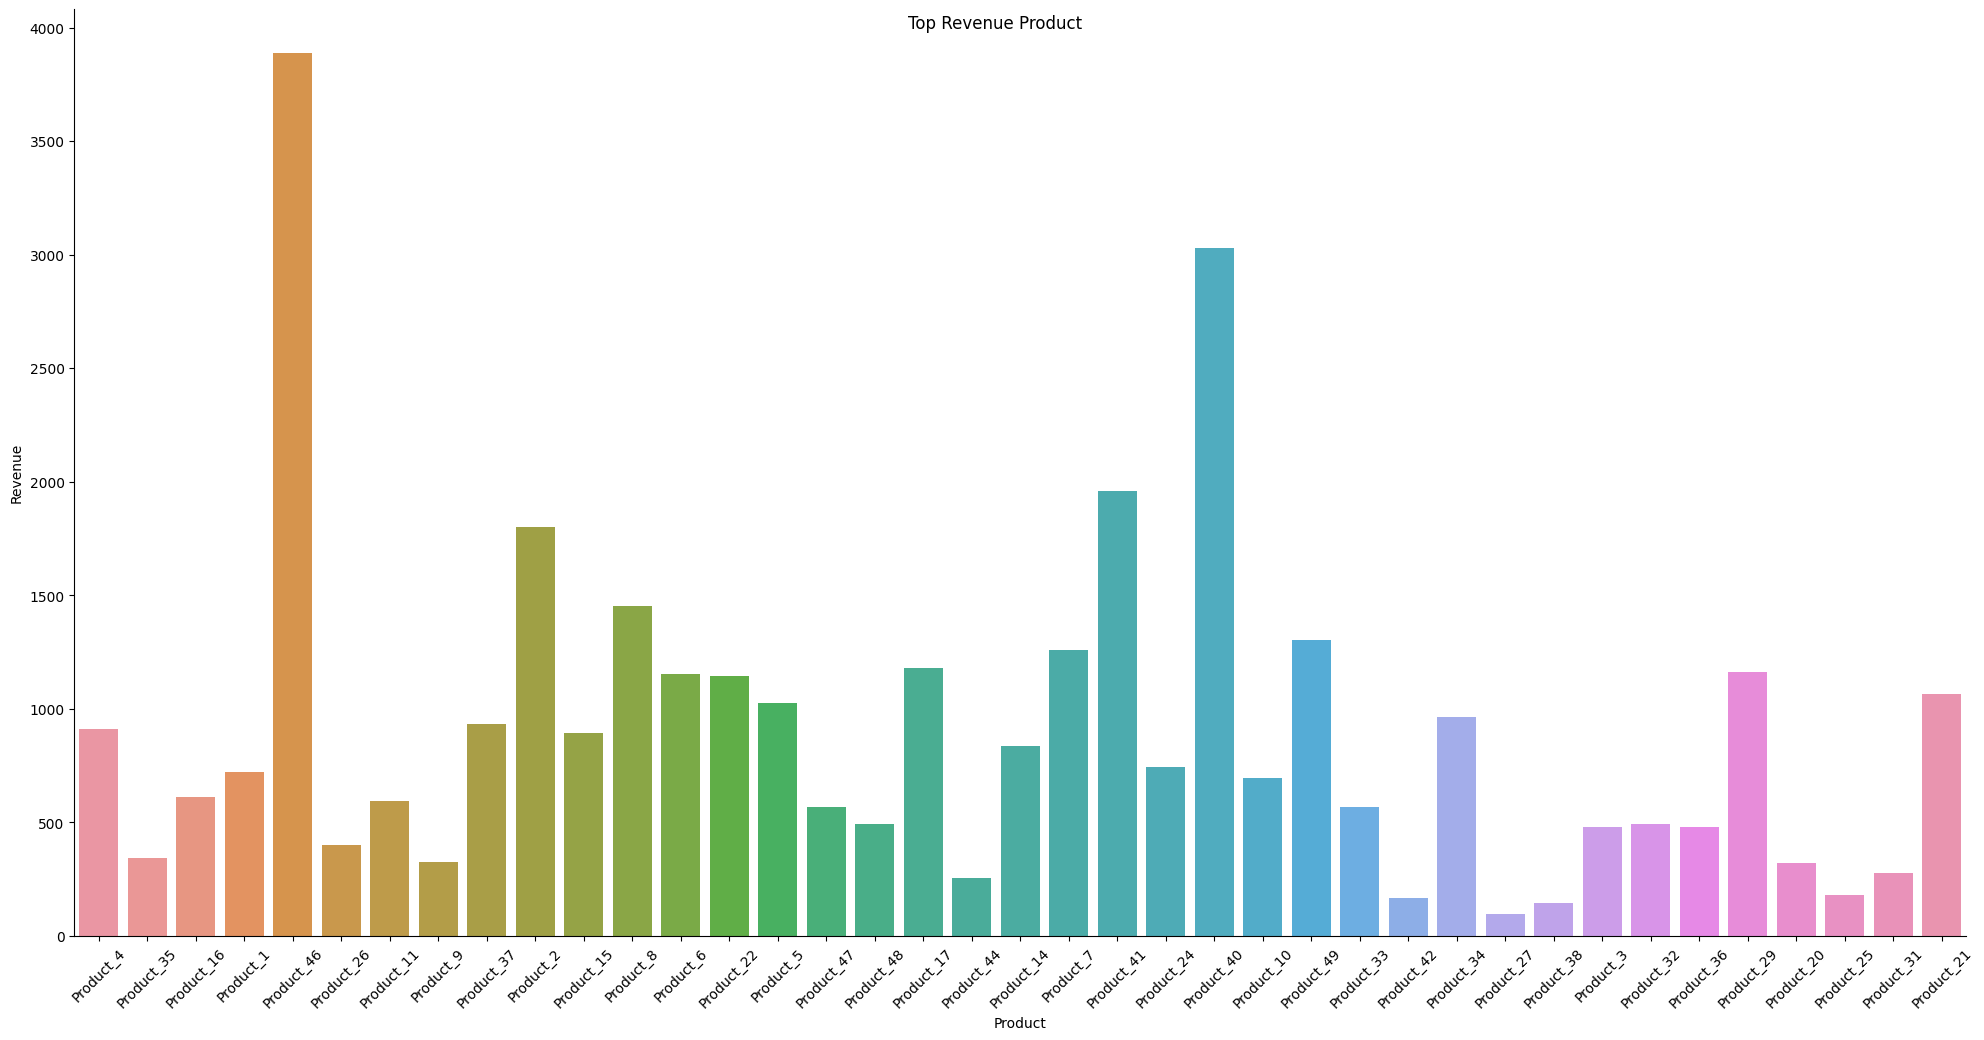

In [411]:
r3_data= df1[df1['Region']=='Region_3']
r3_data.sort_values(by='Product')
a2=sns.catplot(x='Product', y='Revenue', data = r3_data, kind='bar',height=10,aspect=2, ci=False)
a2.fig.suptitle('Top Revenue Product')
plt.xticks(rotation= 45)
plt.show()

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/862220556.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  a2=sns.catplot(x='Product', y='Units Sold', data = r3_data, kind='bar',height=10,aspect=2, ci=False)


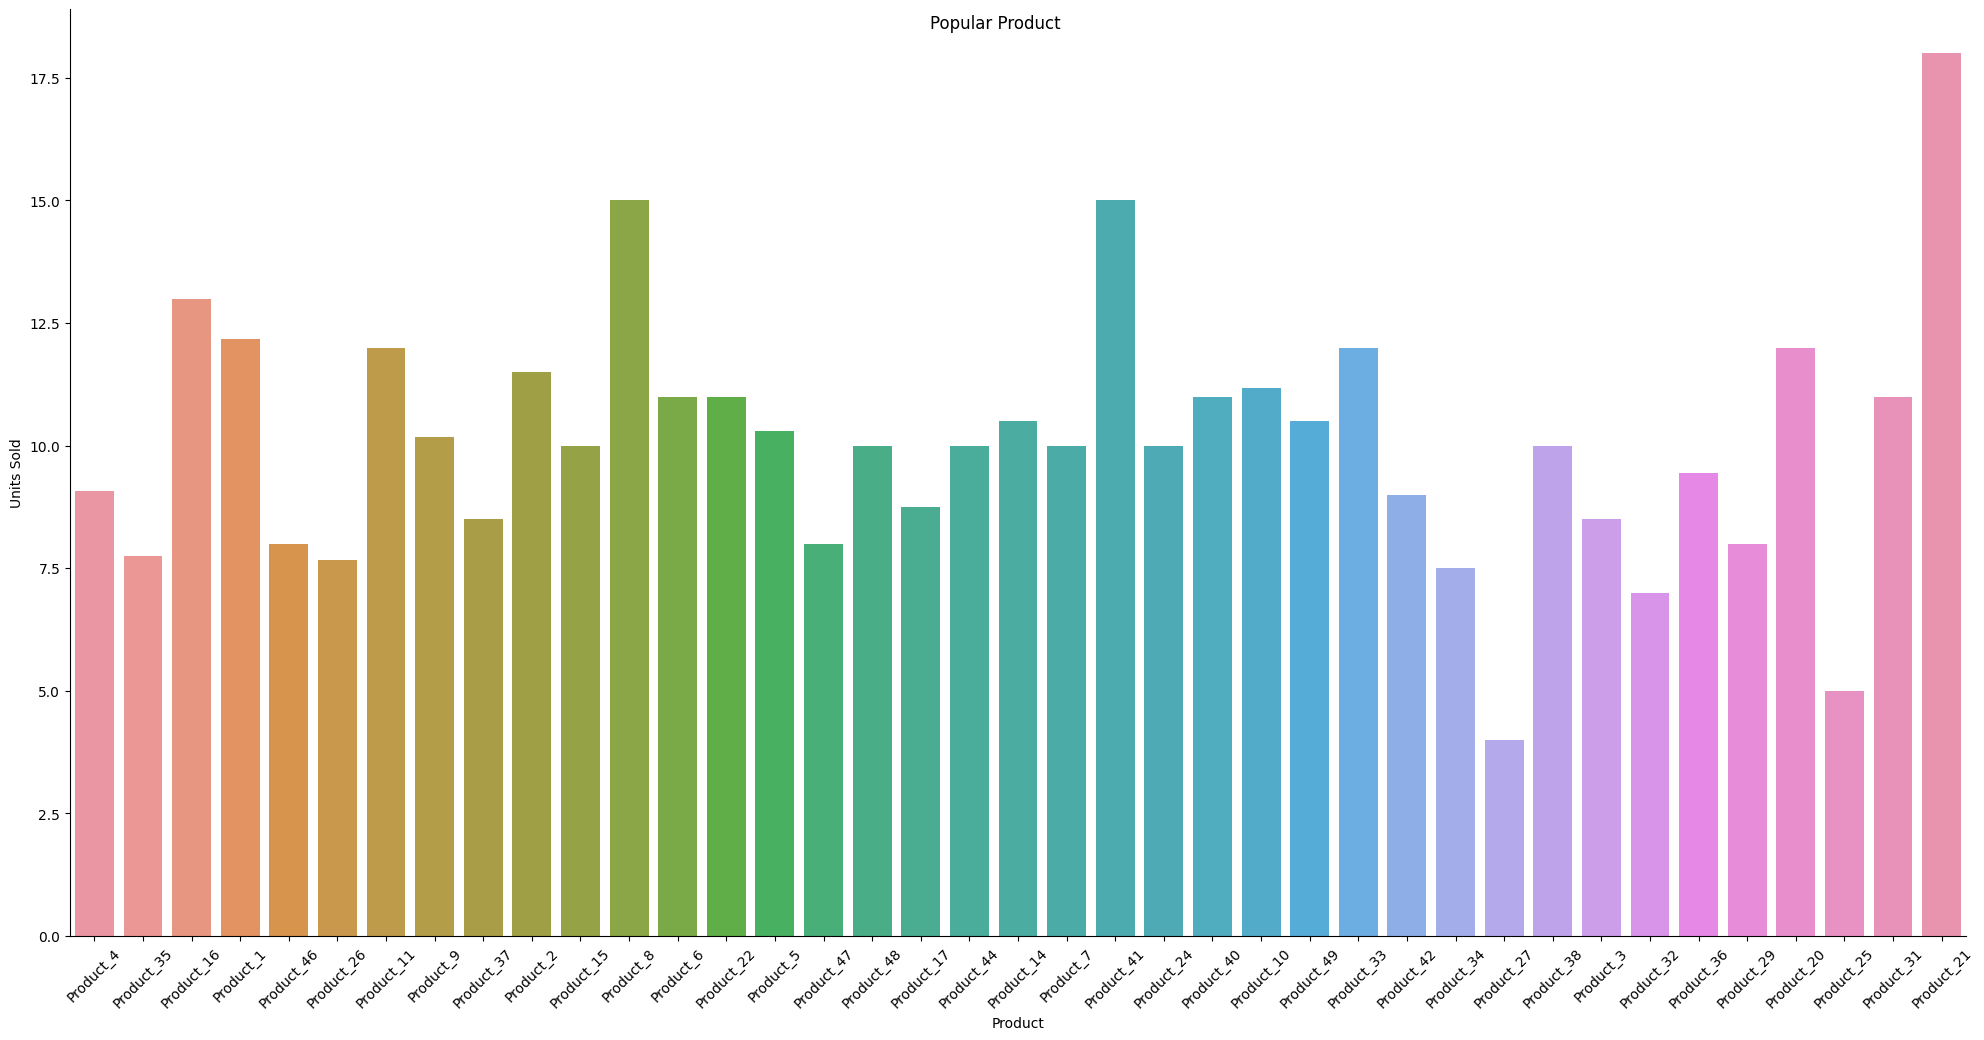

In [410]:
r3_data= df1[df1['Region']=='Region_3']
a2=sns.catplot(x='Product', y='Units Sold', data = r3_data, kind='bar',height=10,aspect=2, ci=False)
a2.fig.suptitle('Popular Product')
plt.xticks(rotation= 45)
plt.show()

Use bar chart to find the top3 products have the most revenue

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_14882/140769974.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(x='Product', y='Revenue', data= df1, height=10, aspect=2,ci=False, kind='bar')


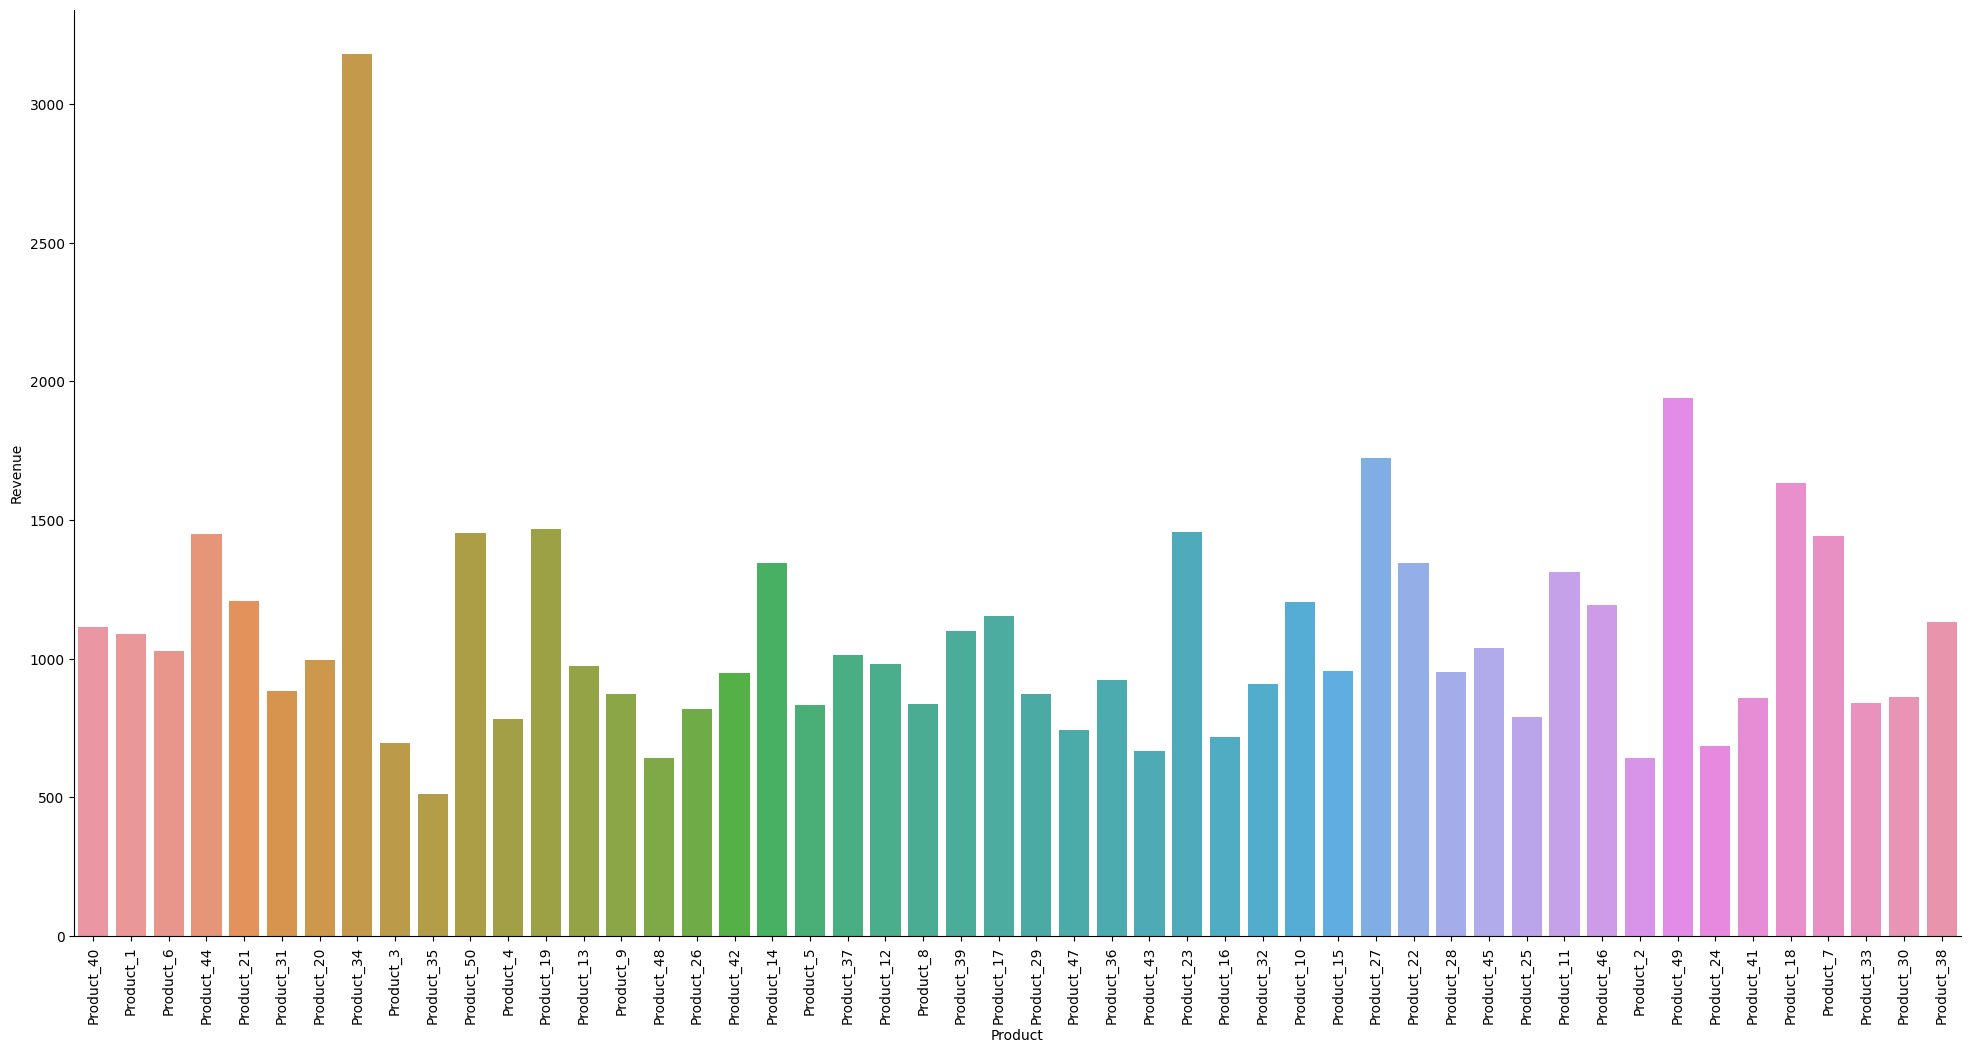

In [407]:
sns.catplot(x='Product', y='Revenue', data= df1, height=10, aspect=2,ci=False, kind='bar')
plt.xticks(rotation = 90)
plt.show()

In [408]:
#
top3=pd.concat([df1[df1['Product']=='Product_34'], df1[df1['Product']=='Product_27'], df1[df1['Product']=='Product_49']])
top3

,Product,Region,Price,Units Sold,Sale Date,Revenue
9,Product_34,Region_1,58.880,10.571429,2022-01-10,622.445714
14,Product_34,Region_4,20.510,6.000000,2022-01-15,123.060000
63,Product_34,Region_8,53.750,9.000000,2022-03-05,483.750000
73,Product_34,Region_1,124.300,12.000000,2022-03-15,1491.600000
103,Product_34,Region_7,142.770,14.000000,2022-04-14,1998.780000
200,Product_34,Region_4,24.470,15.000000,2022-07-20,367.050000
390,Product_34,Region_2,142.470,10.000000,2023-01-26,1424.700000
421,Product_34,Region_2,2636.900,14.000000,2023-02-26,36916.600000
517,Product_34,Region_5,28.810,7.000000,2023-06-02,201.670000
573,Product_34,Region_3,273.540,6.000000,2023-07-28,1641.240000


In the following chart I want to demostrate the units sold vs the dates, In this way we could analysis if the sales of the products are effect by season or trend. However we dont really have data that is large enough and I not sure how to use the interpolate to fill the data gap between each point.

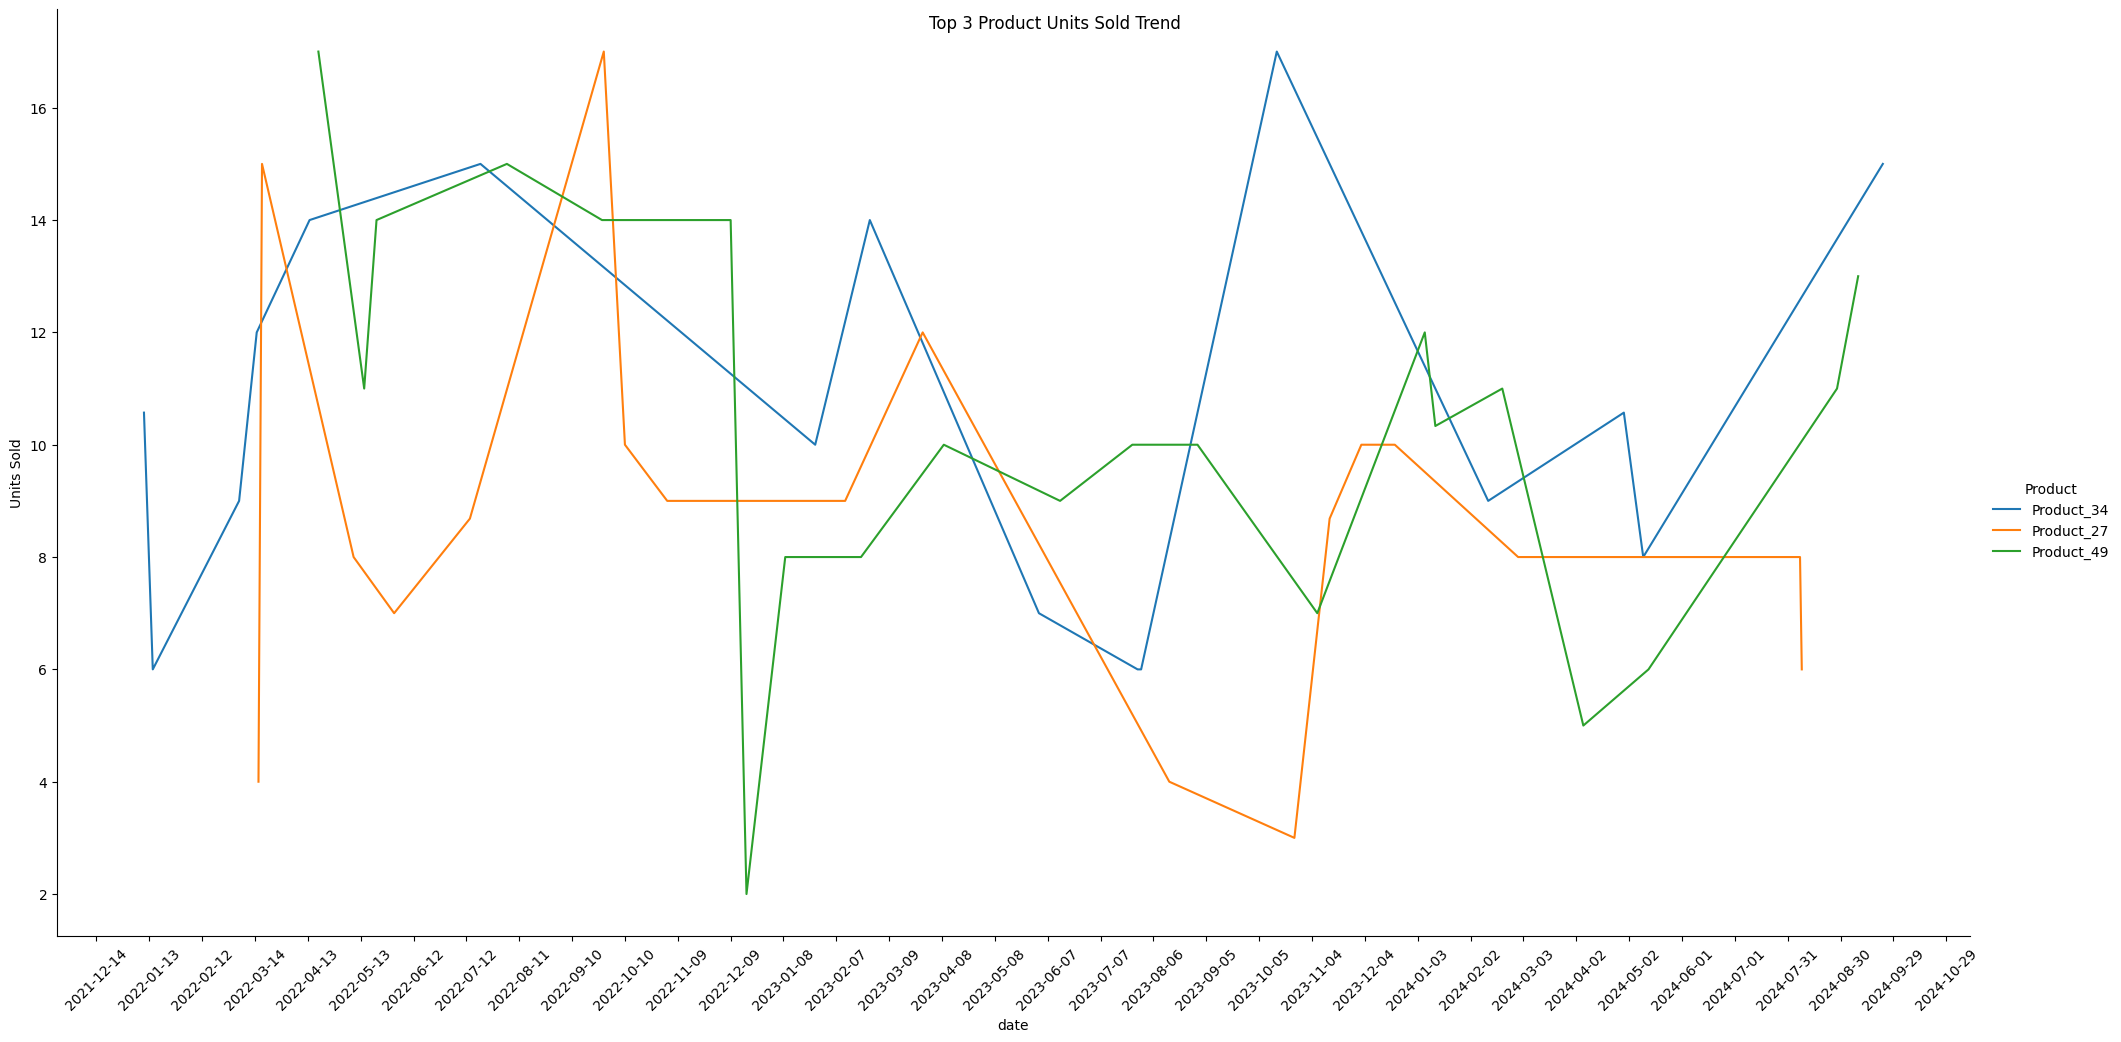

In [415]:
import datetime
import matplotlib.dates as mdates

# create date dataframe
dates_str =top3['Sale Date']
# turned string into date object/将日期字符串转换为日期对象
top3['date'] = [datetime.datetime.strptime(date_str, "%Y-%m-%d") for date_str in dates_str]
a3=sns.relplot(x='date', y= 'Units Sold', data =top3, kind='line', hue='Product',aspect=2,height=10)
a3.fig.suptitle('Top 3 Product Units Sold Trend')
# Set the x interval to 30 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
# Set the x label format/设置 X 轴标签格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation = 45)
plt.show()

In conclusion, region 2 has the most revenue or income amoung all the reigin, the top 3 revenue product in region 2 are proudct 34/27/49, the top3 popular product of region 2 are product 21/8/41. 

The advice I would give to the busniess is increase the storage of the top 3 popular product in region 2 also focus on the marketing of the top3 revenue product to keep increasing the revenue.

My data cleaning approach is first I drop the string data which I cant predict by using this dataset like product and region. Then I try to use the mean and median of the price and sold units to fill the missin data in their columns. I found out the price and sold units is related to region.Thus,I try to group the product and region to have a more accurate mean/median of the products' price and units sold data. However, I was not really sure how to locate the price/units sold data by matching two colunms value. I made a copy of the files to try it later.  In this file, I chose to use the method that group the product and get the general average price and units sold. I this data set, I think we don't need to remove the outliers because the products' price are related to difference region and the time they are being sold.


